In [1]:
steps = [4500, 7800, 2300, 9100, 10200, 15000, 12500]

In [2]:
steps[2]=8500

In [3]:
print(steps)

[4500, 7800, 8500, 9100, 10200, 15000, 12500]


In [4]:
weekend_steps = steps [5:7]

In [5]:
total_steps = sum(steps)

In [6]:
day_count = len(steps)

In [7]:
average_steps = total_steps/day_count

In [8]:
goal = 10000

In [9]:
is_goal_met = average_steps >= goal

In [10]:
print("Average:",average_steps,"Goal Met",is_goal_met)

Average: 9657.142857142857 Goal Met False


In [11]:
import matplotlib.pyplot as plt

In [19]:
days =["Mon","Tue","Wed","Thu","Fri","Sat","Sun"]
steps = [4500, 7800, 8500, 9100, 10200, 15000, 12500]

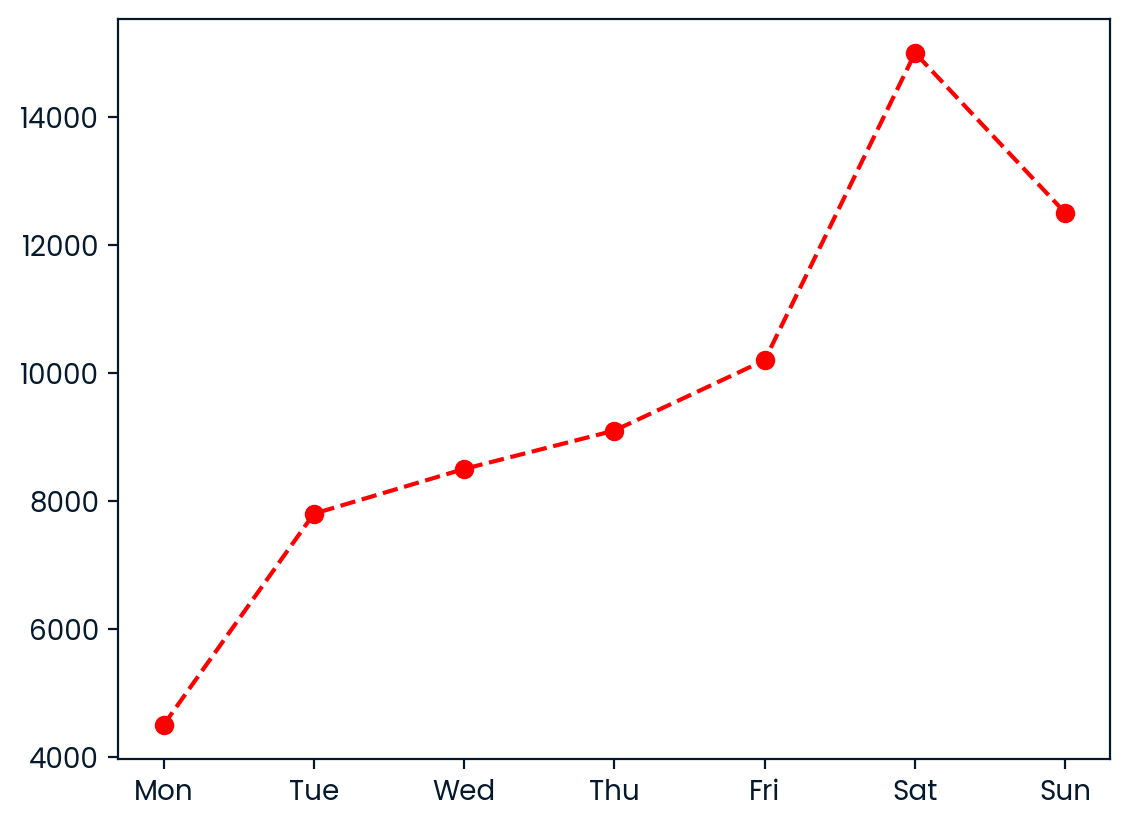

In [14]:
plt.plot(days, steps, marker='o', color='red', linestyle='--')

Text(0, 0.5, 'Number of Steps')

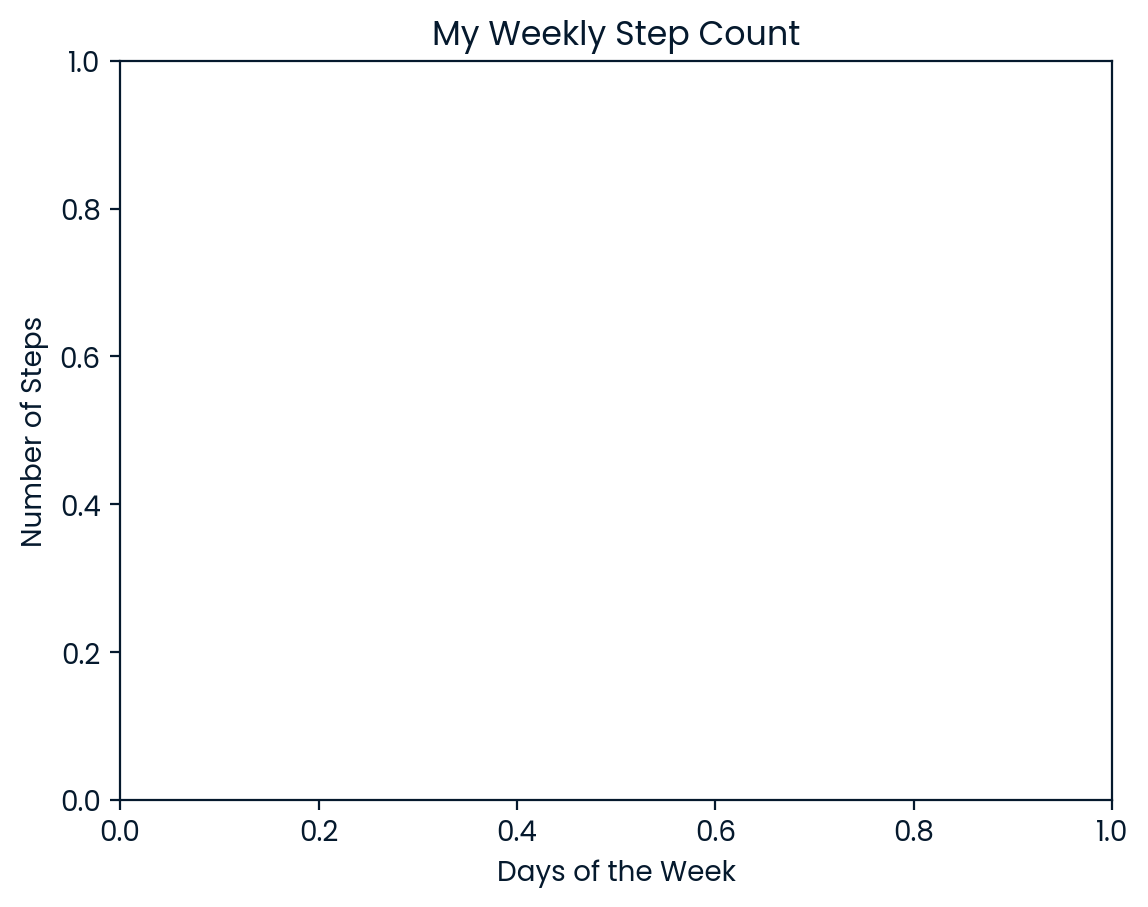

In [22]:
plt.title("My Weekly Step Count")
plt.xlabel("Days of the Week")
plt.ylabel("Number of Steps")

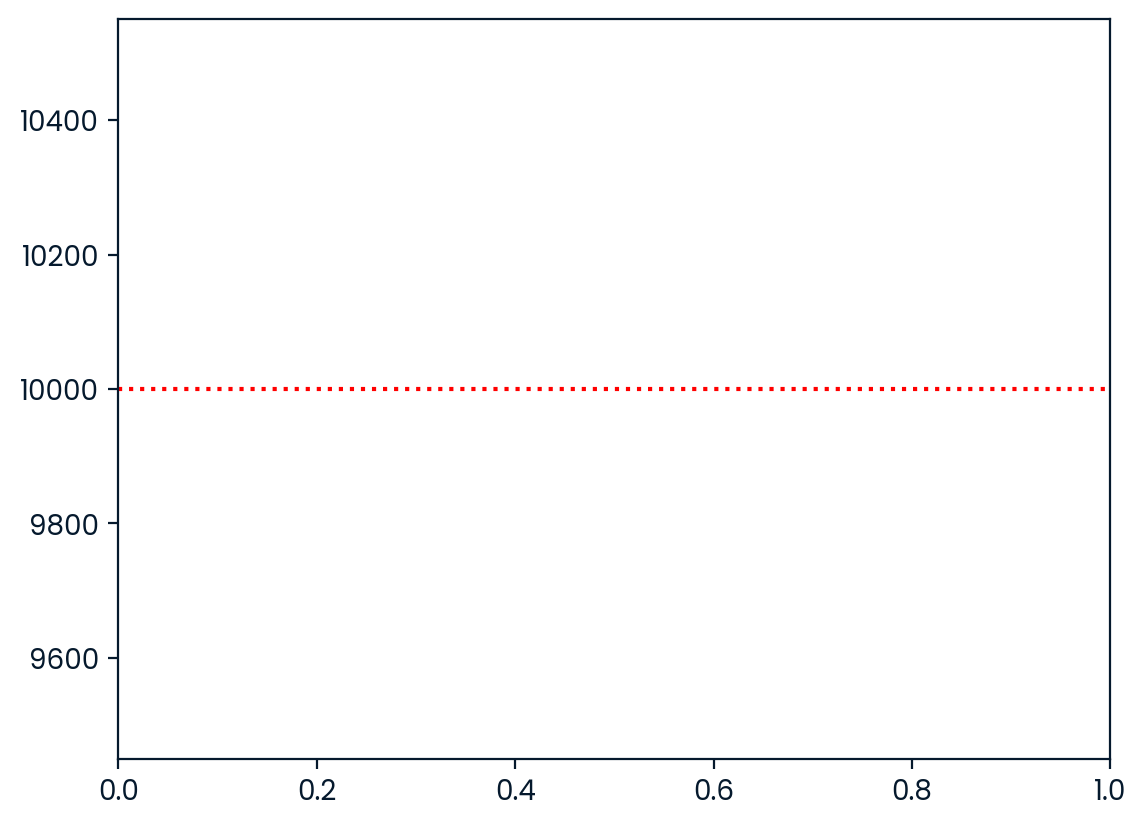

In [26]:
plt.axhline(y=10000, color='red', linestyle=':', label='Goal')

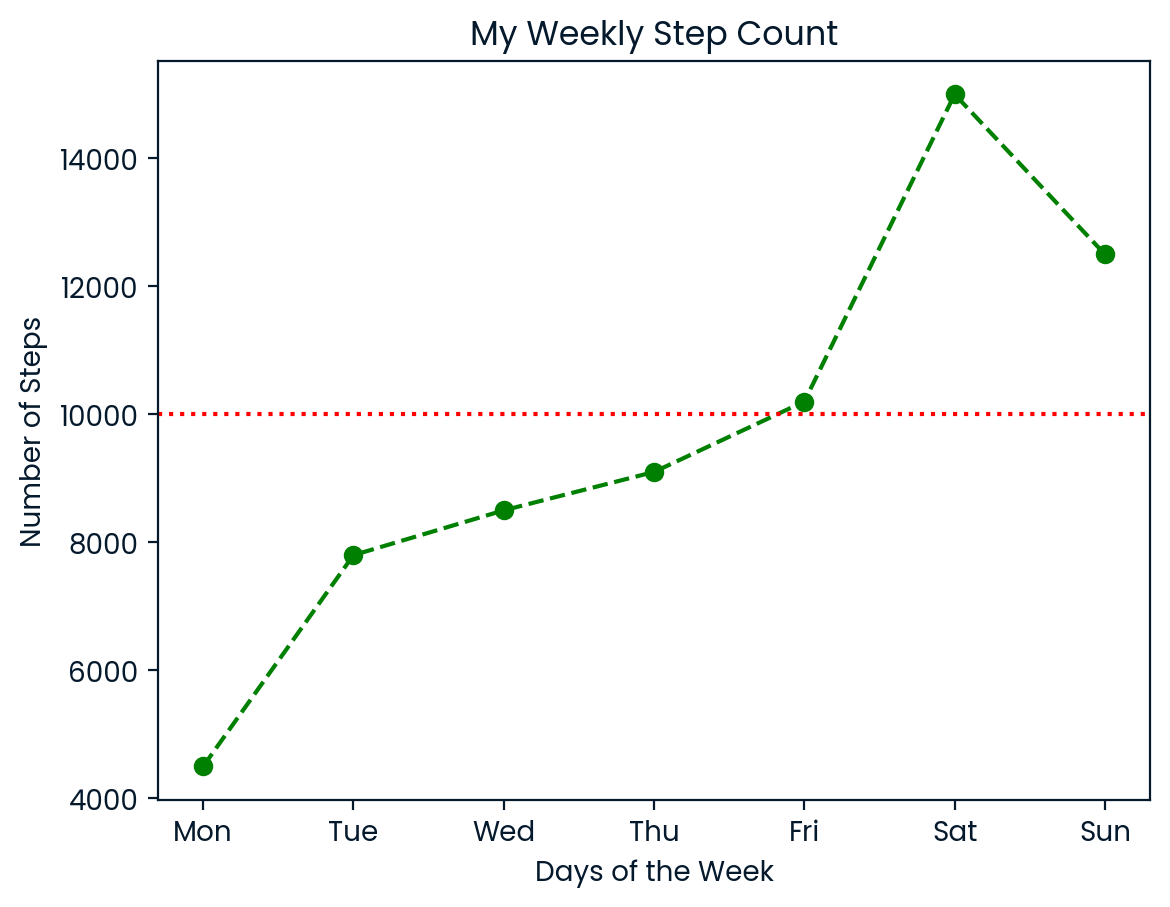

In [27]:
import matplotlib.pyplot as plt
days = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
steps = [4500, 7800, 8500, 9100, 10200, 15000, 12500]
plt.plot(days, steps, marker='o', color='green', linestyle='--')
plt.title("My Weekly Step Count")
plt.xlabel("Days of the Week")
plt.ylabel("Number of Steps")
plt.axhline(y=10000, color='red', linestyle=':', label='Goal')
plt.show()

In [28]:
import numpy as np
import matplotlib.pyplot as plt

In [29]:
steps_list = [4500, 7800, 8500, 9100, 10200, 15000, 12500]
np_steps = np.array(steps_list)

In [30]:
average_steps = np.mean(np_steps)
max_steps = np.max(np_steps)
standard_deviation = np.std(np_steps)

In [31]:
active_days = np_steps[np_steps > 10000]

In [32]:
days = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]

<BarContainer object of 7 artists>

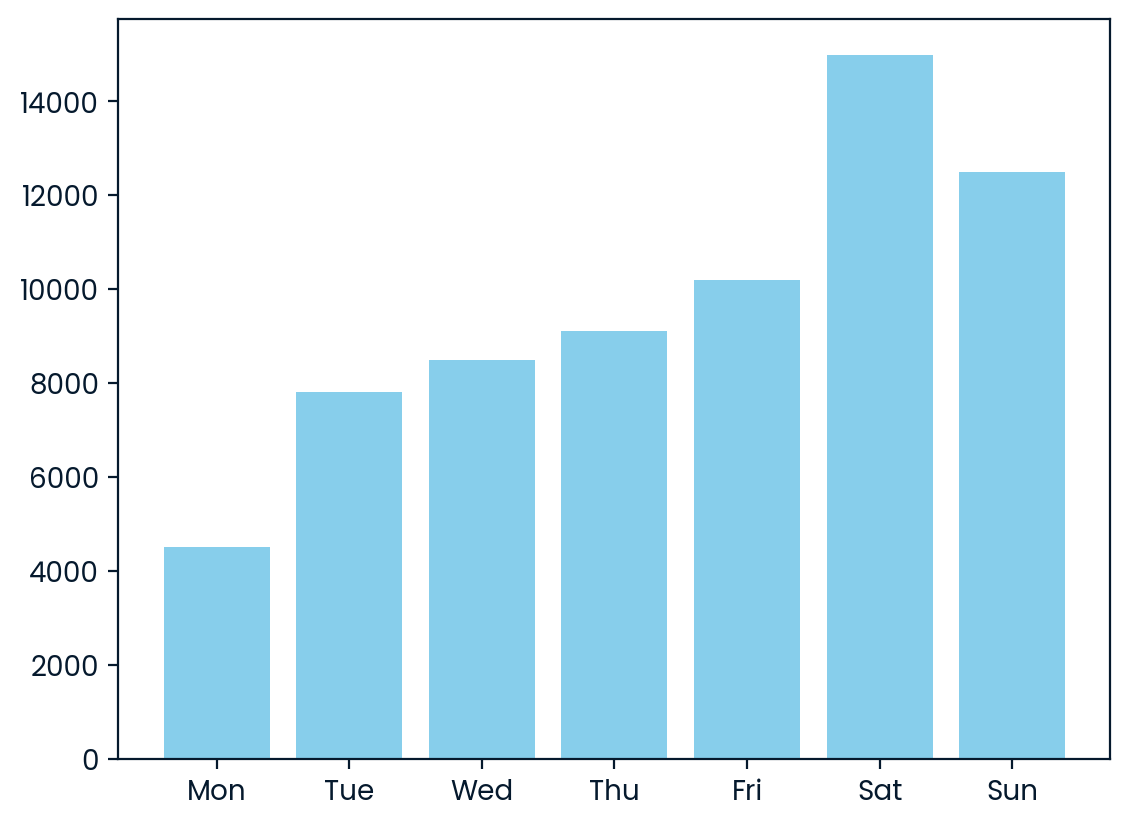

In [33]:
plt.bar(days, np_steps, color='skyblue', label='Daily Steps')

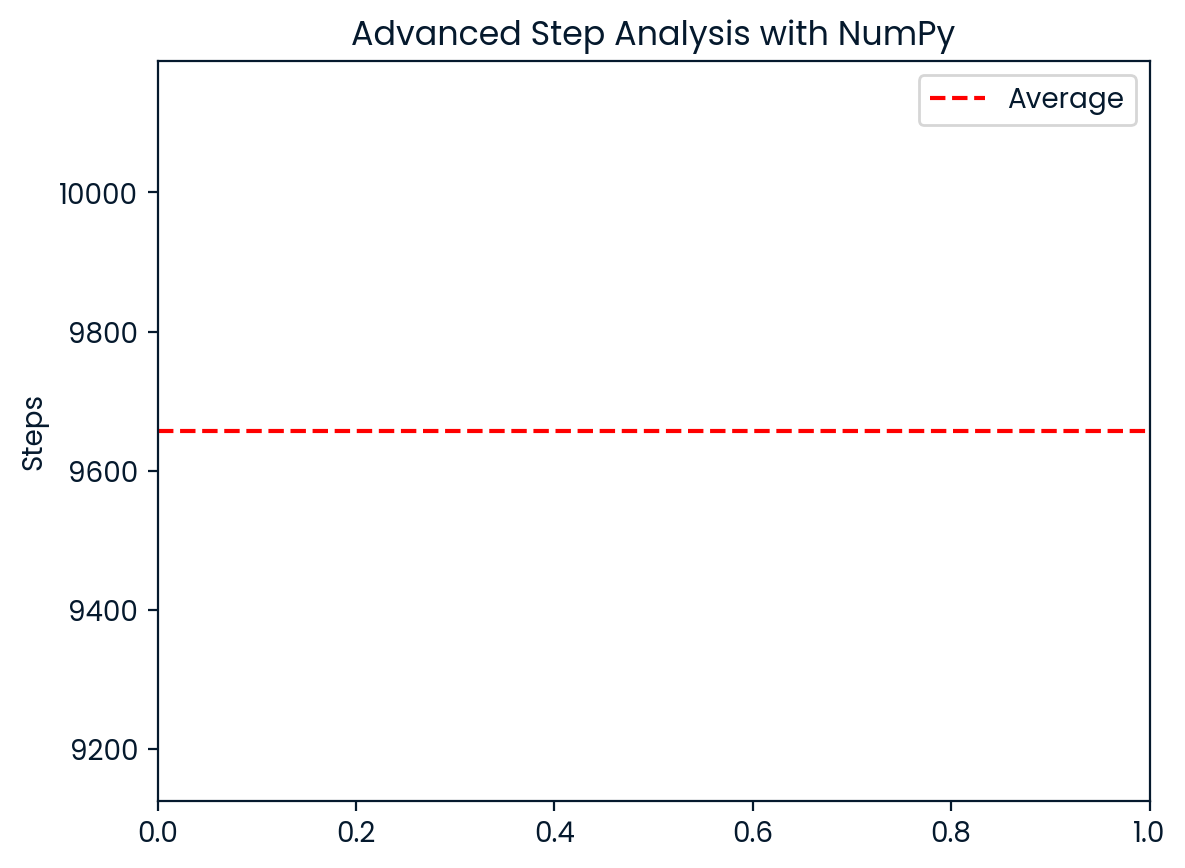

In [35]:
plt.axhline(y=average_steps, color='red', linestyle='--', label='Average')
plt.title("Advanced Step Analysis with NumPy")
plt.ylabel("Steps")
plt.legend() # Etiketleri (label) grafikte gösterir
plt.show()

In [36]:
print("Average Steps (NumPy):", average_steps)
print("Most Active Days Data:", active_days)

Average Steps (NumPy): 9657.142857142857
Most Active Days Data: [10200 15000 12500]


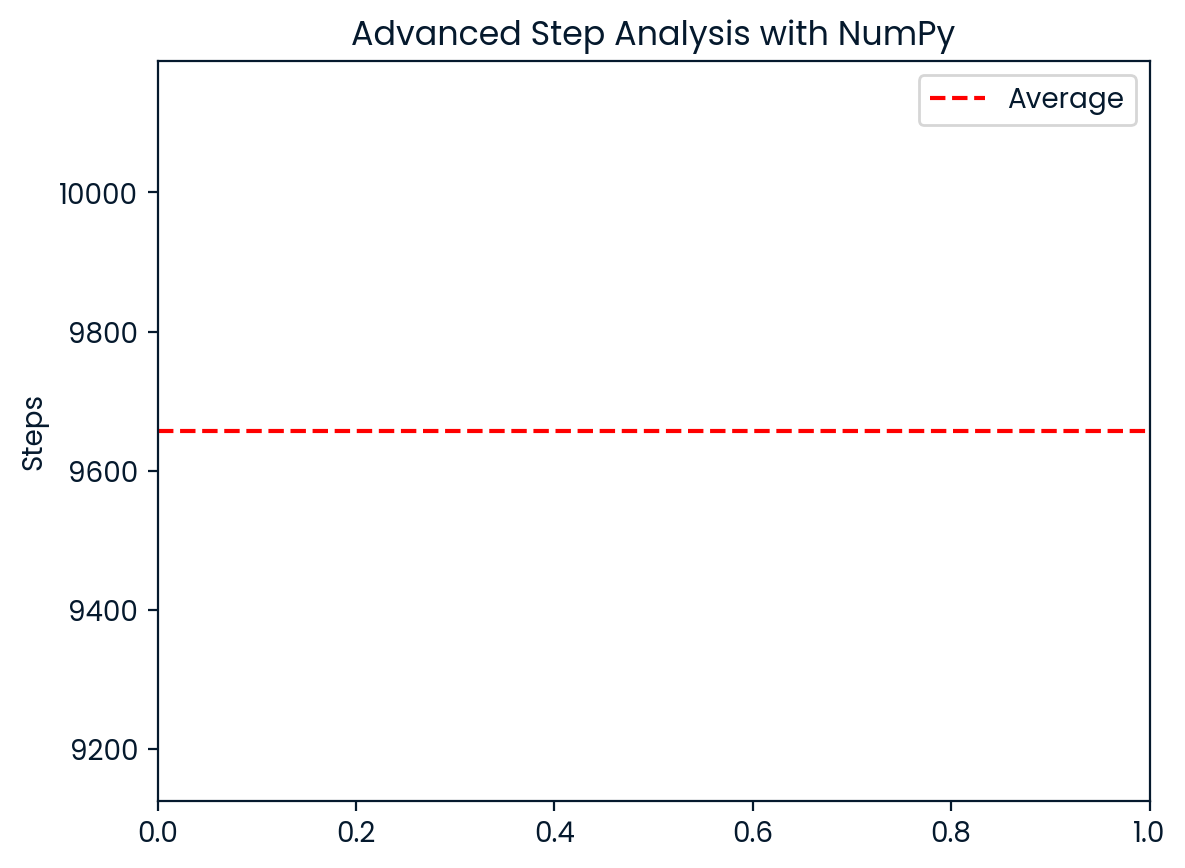

Average Steps (NumPy): 9657.142857142857
Most Active Days Data: [10200 15000 12500]


In [38]:
import numpy as np
import matplotlib.pyplot as plt
steps_list = [4500, 7800, 8500, 9100, 10200, 15000, 12500]
np_steps = np.array(steps_list)
average_steps = np.mean(np_steps)  
max_steps = np.max(np_steps)       
standard_deviation = np.std(np_steps) 
active_days = np_steps[np_steps > 10000]
days = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
plt.axhline(y=average_steps, color='red', linestyle='--', label='Average')
plt.title("Advanced Step Analysis with NumPy")
plt.ylabel("Steps")
plt.legend()
plt.show()
print("Average Steps (NumPy):", average_steps)
print("Most Active Days Data:", active_days)